In [118]:
#Dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from api_key import apikey 
from api_key import g_key 
from pytrends.request import TrendReq

In [119]:
#Set Search URL
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=259&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data = requests.get(search_url, headers={"user-key" : apikey}).json()

#Display JSON Data
data

<Response [200]>


{'results_found': 17502,
 'results_start': 0,
 'results_shown': 20,
 'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 16577492,
     'is_grocery_store': False},
    'apikey': 'c4ae10a41c1f43f16338d7cc86e554cc',
    'id': '16577492',
    'name': 'Chin Chin',
    'url': 'https://www.zomato.com/melbourne/chin-chin-3-cbd?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    'location': {'address': '125 Flinders Lane, CBD, Melbourne',
     'locality': 'CBD',
     'city': 'Melbourne',
     'city_id': 259,
     'latitude': '-37.8155645773',
     'longitude': '144.9703757465',
     'zipcode': '3000',
     'country_id': 14,
     'locality_verbose': 'CBD, Melbourne'},
    'switch_to_order_menu': 0,
    'cuisines': 'Thai, Asian Fusion',
    'timings': '11 AM to 11 PM (Mon-Thu, Sun), 11 AM to 11:30 PM (Fri-Sat)',
    'average_cost_for_two': 135,
    'price_range': 4,
    'currency': '$',
    'highlights': ['Dinner',
     'Cr

In [120]:
#Find Number of Restaurants
resto_num = data["results_found"]

#Print Number of Restaurants
print(f"The number of restaurants in Melbourne, Sydney and Perth is {resto_num}")

The number of restaurants in Melbourne, Sydney and Perth is 17502


In [121]:
#Set City IDs
cityid = [296,259,260]

#Create Empty Lists
rest_id_list = []
rest_name_list =[]
rest_cuis_list = []
rest_local_list = []
rest_city_list = []
rest_lat_list = []
rest_long_list = []
rest_rate_list = []
rest_delivery_list = []
rest_ratenum_list = []

resto_num = 20
loop_num = 0
show_page = 0

#Create For Loop
for citynum in cityid:
    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
    data = requests.get(search_url, headers={"user-key" : apikey}).json()
    for page in range(5):
        for count in range(resto_num):
            try: 
                rest_id = data["restaurants"][count]["restaurant"]["id"]
                rest_name = data["restaurants"][count]["restaurant"]["name"]
                rest_cuis = data["restaurants"][count]["restaurant"]["cuisines"]
                rest_local = data["restaurants"][count]["restaurant"]["location"]["locality"]
                rest_city = data["restaurants"][count]["restaurant"]["location"]["city"]
                rest_lat = data["restaurants"][count]["restaurant"]["location"]["latitude"]
                rest_long = data["restaurants"][count]["restaurant"]["location"]["longitude"]
                rest_rate_num = data["restaurants"][count]["restaurant"]["all_reviews_count"]
                rest_rate = data["restaurants"][count]["restaurant"]["user_rating"]["aggregate_rating"]
                rest_delivery = data["restaurants"][count]["restaurant"]["highlights"]
                
                #Check if they Deliver 
                theydelivery = False
                for doesdelivery in rest_delivery:
                    if doesdelivery == 'Delivery':
                        theydelivery = True

                if theydelivery == True:
                    rest_delivery = "Yes"
                else:
                    rest_delivery = "No"

                #Append Results to List
                rest_id_list.append(rest_id)
                rest_name_list.append(rest_name)
                rest_cuis_list.append(rest_cuis)
                rest_local_list.append(rest_local)
                rest_city_list.append(rest_city)
                rest_lat_list.append(rest_lat)
                rest_long_list.append(rest_long)
                rest_rate_list.append(rest_rate)
                rest_ratenum_list.append(rest_rate_num)
                rest_delivery_list.append(rest_delivery)
                
                #Repeat
                if count == 19:
                    show_page = show_page + 20
                    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
                    data = requests.get(search_url, headers={"user-key" : apikey}).json()
                    count = 0
            except:
                print("error")
    count = 0
    page = 0
    show_page = 0


#Check for Errors
try:            
    restaurants_df = pd.DataFrame({
        "Restaurant ID":rest_id_list,
        "Name":rest_name_list,
        "Cuisine":rest_cuis_list,
        "Locality":rest_local_list,
        "City":rest_city_list,
        "Latitude":rest_lat_list,
        "Longitude":rest_long_list,
        "Rating":rest_rate_list,
        "Total Number Ratings": rest_ratenum_list,
        "Delivery":rest_delivery_list
    })
except:
    print(len(rest_id_list))
    print(len(rest_name_list))
    print(len(rest_cuis_list))
    print(len(rest_local_list))
    print(len(rest_city_list))
    print(len(rest_lat_list))
    print(len(rest_long_list))
    print(len(rest_rate_list))
    print(len(rest_review_list))
    print(len(rest_delivery_list))
    
#Drop Duplicate Results    
restaurants_df = restaurants_df.drop_duplicates()

#Print DataFrame
restaurants_df

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16600038,Bib & Tucker,"Modern Australian, Cafe Food",North Fremantle,Perth,-32.0284215000,115.7498293000,4.1,692,No
1,16597645,Mrs. S,"Patisserie, Cafe Food",Maylands,Perth,-31.9286800875,115.8919624239,4.5,643,No
2,18196379,tbsp.,"Sandwich, Coffee and Tea, Cafe Food",Bayswater,Perth,-31.9194560000,115.9096643000,4.7,335,No
3,16598431,Tuck Shop Cafe,"Modern Australian, Cafe Food",Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
4,16599082,Sayers Sister,"Modern Australian, Coffee and Tea",Perth CBD,Perth,-31.9404785312,115.8615736663,4.6,496,No
...,...,...,...,...,...,...,...,...,...,...
295,18518832,The Grounds of the City,"Cafe Food, Coffee and Tea",CBD,Sydney,-33.8721590260,151.2070344016,4.2,243,No
296,16558672,Pancakes On The Rocks,"Grill, Desserts, Pizza, Cafe Food, Coffee and Tea",The Rocks,Sydney,-33.8586584831,151.2084479257,4.1,324,No
297,17744545,Gogyo,"Japanese, Ramen",Surry Hills,Sydney,-33.8823602716,151.2101410702,4.5,120,No
298,16559582,Spice Temple,"Chinese, Fusion, Yum Cha",CBD,Sydney,-33.8661222694,151.2100026011,4.3,244,No


In [123]:
#Save DataFrame to csv 
restaurants_df.to_csv("Multi_City_Data.csv", encoding="utf-8", index=False)

In [124]:
#Number of Restaurants that Deliver
restaurants_df["Delivery"].value_counts()

No     273
Yes     27
Name: Delivery, dtype: int64

In [125]:
#Sort DataFrame by Rating
restaurants_df = restaurants_df.sort_values(by=["Rating"],ascending=False)

#Print DataFrame
restaurants_df

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
137,17881527,Dexter,"American, BBQ",Preston,Melbourne,-37.7361956460,145.0044562295,4.9,683,No
70,16598976,Marumo,"Japanese, Seafood, Modern Australian",Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
40,16598837,Run Amuk,Fast Food,"Orient Street, South Fremantle",Perth,-32.0722768677,115.7530652359,4.9,341,No
230,16559171,Tetsuya's,Japanese,CBD,Sydney,-33.8751364638,151.2049677596,4.9,330,No
129,16572612,Vue de monde,"Australian, Contemporary",CBD,Melbourne,-37.8189544974,144.9579336494,4.9,986,No
...,...,...,...,...,...,...,...,...,...,...
77,16601688,Tropico,"Tapas, Modern Australian, Pizza",North Beach,Perth,-31.8560080000,115.7544120000,4.0,302,No
16,16599949,Gordon St Garage,"Modern Australian, Cafe Food, Coffee and Tea",West Perth,Perth,-31.9482935331,115.8471752331,4.0,787,No
58,16599918,Jamie's Italian,Italian,Perth CBD,Perth,-31.9517195884,115.8580579609,3.8,1473,No
86,16598361,The Wild Fig Cafe,"Modern Australian, Cafe Food",Scarborough,Perth,-31.8979994965,115.7571093366,3.3,709,No


In [126]:
#Count Number of Cuisines
top_cuisines = restaurants_df["Cuisine"].value_counts()

#Get Top 10
top_10_cuisines = top_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_10_cuisines

Coffee and Tea, Cafe Food       21
Japanese                        12
Cafe Food, Coffee and Tea       12
Italian                         10
Japanese, Sushi                 10
Modern Australian, Cafe Food     9
Modern Australian                8
Japanese, Ramen                  7
Cafe Food                        6
Sushi, Japanese                  5
Name: Cuisine, dtype: int64

<AxesSubplot:>

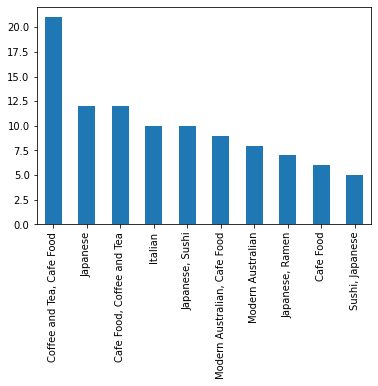

In [127]:
#Plot as Bar Graph
top_10_cuisines.plot(kind='bar')

In [130]:
#Get Top Restaurants by City
perth_top = restaurants_df.loc[restaurants_df["City"]=="Perth"]

#Print DataFrame
perth_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
70,16598976,Marumo,"Japanese, Seafood, Modern Australian",Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
40,16598837,Run Amuk,Fast Food,"Orient Street, South Fremantle",Perth,-32.0722768677,115.7530652359,4.9,341,No
10,16597513,Pacific Rim Mix Plate,"Hawaiian, Japanese",Applecross,Perth,-32.0219001116,115.8322872967,4.9,213,No
59,16596002,Galileo Buona Cucina,Italian,Shenton Park,Perth,-31.9609760000,115.8122330000,4.8,207,No
23,16598168,Nobu Perth,"Japanese, Sushi",Burswood,Perth,-31.9605255258,115.8940253779,4.8,663,No
6,16596036,Ha-Lu,"Japanese, Tapas","Oxford Street, Leederville",Perth,-31.9233773227,115.8411462978,4.8,243,No
3,16598431,Tuck Shop Cafe,"Modern Australian, Cafe Food",Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
9,16596238,Nao Japanese,"Japanese, Ramen","Hay Street, Perth CBD",Perth,-31.9546343231,115.8609222248,4.7,343,No
2,18196379,tbsp.,"Sandwich, Coffee and Tea, Cafe Food",Bayswater,Perth,-31.9194560000,115.9096643000,4.7,335,No
88,16598265,Petite Mort,"European, French, Modern Australian",Shenton Park,Perth,-31.9610180000,115.8114700000,4.7,269,No


In [131]:
#Get Top Restaurants by City
melbourne_top = restaurants_df.loc[restaurants_df["City"]=="Melbourne"]

#Print DataFrame
melbourne_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
137,17881527,Dexter,"American, BBQ",Preston,Melbourne,-37.7361956460,145.0044562295,4.9,683,No
129,16572612,Vue de monde,"Australian, Contemporary",CBD,Melbourne,-37.8189544974,144.9579336494,4.9,986,No
133,16586014,Minamishima,"Japanese, Sushi",Richmond,Melbourne,-37.8198314176,145.0051938370,4.9,293,No
163,16582263,Gelato Messina,"Ice Cream, Desserts",Fitzroy,Melbourne,-37.8018912821,144.9836744741,4.9,835,No
136,16578793,Patricia Coffee Brewers,Coffee and Tea,CBD,Melbourne,-37.8147135635,144.9582602084,4.9,364,No
103,16583098,Lune Croissanterie,"Bakery, French",Fitzroy,Melbourne,-37.7960258682,144.9799244106,4.9,753,No
139,16582574,Hinoki Japanese Pantry,"Japanese, Sushi",Fitzroy,Melbourne,-37.8005961095,144.9838920683,4.9,272,No
124,16573759,Le Petit Gateau,"French, Desserts, Coffee and Tea",CBD,Melbourne,-37.8163464526,144.9596324936,4.9,350,No
102,16577212,Beatrix,"Coffee and Tea, Bakery",North Melbourne,Melbourne,-37.8023673299,144.9444753304,4.9,384,No
185,18097646,Agathé Pâtisserie,"Bakery, Patisserie","South Melbourne Market, South Melbourne",Melbourne,-37.8325827938,144.9569066986,4.9,319,No


In [132]:
#Get Top Restaurants by City
sydney_top = restaurants_df.loc[restaurants_df["City"]=="Sydney"]

#Print DataFrame
sydney_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
230,16559171,Tetsuya's,Japanese,CBD,Sydney,-33.8751364638,151.2049677596,4.9,330,No
233,16562433,Cow & The Moon,"Ice Cream, Desserts, Coffee and Tea",Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
215,15547004,Restaurant Hubert,"French, European",CBD,Sydney,-33.8653806250,151.2104904279,4.9,231,No
214,16558798,Quay,Modern Australian,Circular Quay,Sydney,-33.8580292558,151.2099704146,4.9,452,No
227,16569454,LuMi Bar & Dining,"Italian, Japanese",Pyrmont,Sydney,-33.8669045524,151.1973965541,4.9,197,No
251,16566535,Lorraine's Patisserie,"Desserts, Bakery","Ivy, CBD",Sydney,-33.8666116843,151.2077032775,4.9,111,No
272,16568476,La Mamma del Gelato Anita,Ice Cream,"Central Park, Chippendale",Sydney,-33.8850718252,151.2004720420,4.9,231,No
262,15545439,Manpuku - Chatswood,"Japanese, Ramen",Chatswood,Sydney,-33.7943935138,151.1895571277,4.9,196,No
280,16559833,Gelato Messina,"Desserts, Ice Cream, Beverages",Darlinghurst,Sydney,-33.8780561783,151.2213775143,4.8,338,No
201,16564139,Café Cre Asion,"Desserts, Cafe Food, Coffee and Tea",CBD,Sydney,-33.8779718367,151.2106550485,4.8,415,No
